<a href="https://colab.research.google.com/github/joaovfin/Projetos/blob/main/05_Probabilistic_portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Criando carteiras aleatórias

In [1]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import seaborn as sns
sns.set()
import random


     |████████████████████████████████| 5.5MB 5.9MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=830054cb8b1a06f23712492e59d2e07c42125802c6a4960c876deea141a02e5d
  Stored in directory: /tmp/pip-ephem-wheel-cache-r84qe8to/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
ativos_ibov = "ABEV3.SA AZUL4.SA B3SA3.SA BBAS3.SA BBDC3.SA BBDC4.SA BBSE3.SA BPAC11.SA BRAP4.SA BRDT3.SA BRFS3.SA BRKM5.SA BRML3.SA BTOW3.SA CCRO3.SA CIEL3.SA CMIG4.SA COGN3.SA CRFB3.SA CSAN3.SA CSNA3.SA CVCB3.SA CYRE3.SA ECOR3.SA EGIE3.SA ELET3.SA ELET6.SA EMBR3.SA ENBR3.SA EQTL3.SA FLRY3.SA GGBR4.SA GNDI3.SA GOAU4.SA GOLL4.SA HAPV3.SA HGTX3.SA HYPE3.SA IGTA3.SA IRBR3.SA ITSA4.SA ITUB4.SA JBSS3.SA KLBN11.SA LAME4.SA LREN3.SA MGLU3.SA MRFG3.SA MRVE3.SA MULT3.SA NTCO3.SA PCAR4.SA PETR3.SA PETR4.SA QUAL3.SA RADL3.SA RAIL3.SA RENT3.SA SANB11.SA SBSP3.SA SMLS3.SA SULA11.SA SUZB3.SA TAEE11.SA TIMP3.SA TOTS3.SA UGPA3.SA USIM5.SA VALE3.SA VIVT4.SA VVAR3.SA WEGE3.SA YDUQ3.SA"

dados = yf.download(tickers=ativos_ibov, period='1y')["Adj Close"]

ibov = yf.download('BOVA11.SA', period='1y')["Adj Close"]
ibov = ibov / ibov.iloc[0]

[*********************100%***********************]  73 of 73 completed

3 Failed downloads:
- TIMP3.SA: No data found, symbol may be delisted
- VIVT4.SA: No data found, symbol may be delisted
- PCAR4.SA: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed


In [6]:
dados.dropna(how='all', inplace=True)
dados.dropna(axis=1, inplace=True, thresh=246)
dados

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BPAC11.SA,BRAP4.SA,BRDT3.SA,BRFS3.SA,BRKM5.SA,BRML3.SA,BTOW3.SA,CCRO3.SA,CIEL3.SA,CMIG4.SA,COGN3.SA,CRFB3.SA,CSAN3.SA,CSNA3.SA,CVCB3.SA,CYRE3.SA,ECOR3.SA,EGIE3.SA,ELET3.SA,ELET6.SA,EMBR3.SA,ENBR3.SA,EQTL3.SA,FLRY3.SA,GGBR4.SA,GNDI3.SA,GOAU4.SA,GOLL4.SA,HAPV3.SA,HGTX3.SA,HYPE3.SA,IGTA3.SA,IRBR3.SA,ITSA4.SA,ITUB4.SA,JBSS3.SA,KLBN11.SA,LAME4.SA,LREN3.SA,MGLU3.SA,MRFG3.SA,MRVE3.SA,MULT3.SA,NTCO3.SA,PETR3.SA,PETR4.SA,QUAL3.SA,RADL3.SA,RAIL3.SA,RENT3.SA,SANB11.SA,SBSP3.SA,SMLS3.SA,SULA11.SA,SUZB3.SA,TAEE11.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VVAR3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-12,16.144161,59.660000,48.234936,49.620007,28.552401,30.016479,33.609722,77.822876,37.393913,29.363863,31.250000,31.860001,18.559999,70.930000,17.483049,7.203582,13.788323,11.60,21.855345,82.444313,12.952947,33.740002,30.334154,17.600000,47.712109,30.306883,32.450615,19.129999,21.036551,25.612442,30.873671,20.981831,72.390282,9.835512,36.299999,11.695030,24.271351,37.617832,55.071079,29.764212,12.844719,33.989235,25.226690,21.940001,27.060017,55.613930,13.651558,10.78,19.853207,33.362358,49.279999,31.340090,30.127766,42.875496,24.294043,24.440001,55.063305,41.766792,61.848618,28.644005,56.538361,40.000000,28.217289,25.914095,24.765680,9.769040,50.940556,14.99,44.204086,53.128502
2020-02-13,15.775706,59.000000,47.944836,48.851002,27.880165,29.441456,33.691147,80.525818,36.617069,29.688536,31.330000,30.830000,18.400000,73.330002,17.329014,7.085490,13.514020,11.80,21.736887,81.533707,12.962927,33.880001,30.287945,17.200001,47.289463,30.169979,32.322685,19.170000,21.065781,25.680639,29.795666,20.883232,72.250771,9.835512,35.400002,11.689055,24.836254,37.135555,54.120384,28.969322,12.652575,33.463779,25.695845,21.750000,27.357487,56.261852,13.922441,11.30,19.921164,32.812862,49.169998,30.743135,29.717796,42.072701,23.864487,23.799999,54.606758,40.300438,61.722874,28.207314,56.190830,41.299999,28.019526,25.814934,24.212700,10.254521,50.047871,15.01,45.206013,52.382561
2020-02-14,15.911450,59.240002,48.544388,47.918587,27.128317,28.777954,32.881355,76.323448,35.993679,29.096483,30.900000,30.930000,18.080000,70.599998,17.232740,7.174058,13.550593,11.71,21.371643,80.975594,12.633615,33.099998,30.038393,17.030001,47.148582,30.794601,32.732052,18.559999,20.968344,25.281206,30.096729,20.212759,71.792351,9.501438,36.000000,11.647239,24.300571,36.007023,54.377865,30.603262,12.489255,32.899406,25.197371,21.260000,26.891449,55.417583,13.746735,11.65,19.377506,32.910988,50.889999,30.444660,29.417818,41.329365,24.298025,23.020000,54.586910,39.873161,62.332268,28.458965,55.998775,39.810001,27.893679,25.682720,23.847336,9.808671,48.953617,14.73,45.206013,52.510155
2020-02-17,16.095680,58.700001,49.985241,47.197647,26.977949,28.539103,32.166130,76.136009,37.403503,29.125134,31.000000,31.200001,17.760000,71.650002,17.271252,7.124854,13.779181,11.71,22.112001,79.369789,13.062718,33.340000,30.334154,17.150000,47.524265,30.931505,32.945263,18.870001,20.987831,25.690382,30.184137,20.409958,72.171043,9.589870,36.389999,11.922042,24.407707,36.151703,54.863117,32.325520,12.489255,32.597744,25.226690,21.080000,27.198835,56.153870,14.361712,12.54,19.416338,32.577362,50.619999,30.521687,29.357824,42.221363,24.013639,22.719999,54.815186,39.727493,63.193157,28.421959,55.578072,40.000000,28.307184,27.672552,24.321320,9.640240,51.266914,15.10,45.414341,52.853680
2020-02-18,15.688438,58.020000,49.443718,47.649433,26.825712,28.427443,31.784679,73.571190,37.058239,28.905499,30.850000,31.350000,17.670000,72.000000,17.444542,7.282309,13.770036,11.40,21.756632,77.881485,13.292238,32.509998,30.029150,17.180000,47.759071,32.771137,34.668003,18.770000,21.046293,25.135069,30.057884,20.232477,71.463478,9.471962,35.869999,11.744812,24.992090,35.100330,54.724472,32.060558,12.671790,32.733982,25.119177,20.990000,27.069931,55.810265,14.207967,13.46,19.600794,33.185734,49.

In [7]:
retorno =dados.pct_change()
retorno

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BPAC11.SA,BRAP4.SA,BRDT3.SA,BRFS3.SA,BRKM5.SA,BRML3.SA,BTOW3.SA,CCRO3.SA,CIEL3.SA,CMIG4.SA,COGN3.SA,CRFB3.SA,CSAN3.SA,CSNA3.SA,CVCB3.SA,CYRE3.SA,ECOR3.SA,EGIE3.SA,ELET3.SA,ELET6.SA,EMBR3.SA,ENBR3.SA,EQTL3.SA,FLRY3.SA,GGBR4.SA,GNDI3.SA,GOAU4.SA,GOLL4.SA,HAPV3.SA,HGTX3.SA,HYPE3.SA,IGTA3.SA,IRBR3.SA,ITSA4.SA,ITUB4.SA,JBSS3.SA,KLBN11.SA,LAME4.SA,LREN3.SA,MGLU3.SA,MRFG3.SA,MRVE3.SA,MULT3.SA,NTCO3.SA,PETR3.SA,PETR4.SA,QUAL3.SA,RADL3.SA,RAIL3.SA,RENT3.SA,SANB11.SA,SBSP3.SA,SMLS3.SA,SULA11.SA,SUZB3.SA,TAEE11.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VVAR3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-13,-0.022823,-0.011063,-0.006014,-0.015498,-0.023544,-0.019157,0.002423,0.034732,-0.020775,0.011057,0.002560,-0.032329,-0.008621,0.033836,-0.008811,-0.016394,-0.019894,0.017241,-0.005420,-0.011045,0.000770,0.004149,-0.001523,-0.022727,-0.008858,-0.004517,-0.003942,0.002091,0.001389,0.002663,-0.034917,-0.004699,-0.001927,0.000000,-0.024793,-0.000511,0.023274,-0.012820,-0.017263,-0.026706,-0.014959,-0.015459,0.018598,-0.008660,0.010993,0.011650,0.019843,0.048238,0.003423,-0.016471,-0.002232,-0.019048,-0.013608,-0.018724,-0.017682,-0.026187,-0.008291,-0.035108,-0.002033,-0.015245,-0.006147,0.032500,-0.007009,-0.003827,-0.022328,0.049696,-0.017524,0.001334,0.022666,-0.014040
2020-02-14,0.008605,0.004068,0.012505,-0.019087,-0.026967,-0.022536,-0.024036,-0.052187,-0.017025,-0.019942,-0.013725,0.003244,-0.017391,-0.037229,-0.005556,0.012500,0.002706,-0.007627,-0.016803,-0.006845,-0.025404,-0.023023,-0.008239,-0.009884,-0.002979,0.020703,0.012665,-0.031821,-0.004625,-0.015554,0.010104,-0.032106,-0.006345,-0.033966,0.016949,-0.003577,-0.021569,-0.030390,0.004758,0.056402,-0.012908,-0.016865,-0.019399,-0.022529,-0.017035,-0.015006,-0.012620,0.030973,-0.027290,0.002990,0.034981,-0.009709,-0.010094,-0.017668,0.018167,-0.032773,-0.000363,-0.010602,0.009873,0.008922,-0.003418,-0.036077,-0.004491,-0.005122,-0.015090,-0.043478,-0.021864,-0.018654,0.000000,0.002436
2020-02-17,0.011578,-0.009115,0.029681,-0.015045,-0.005543,-0.008300,-0.021752,-0.002456,0.039169,0.000985,0.003236,0.008729,-0.017699,0.014873,0.002235,-0.006859,0.016869,0.000000,0.034642,-0.019831,0.033965,0.007251,0.009846,0.007046,0.007968,0.004446,0.006514,0.016703,0.000929,0.016185,0.002904,0.009756,0.005275,0.009307,0.010833,0.023594,0.004409,0.004018,0.008924,0.056277,0.000000,-0.009169,0.001164,-0.008467,0.011431,0.013286,0.044736,0.076395,0.002004,-0.010137,-0.005306,0.002530,-0.002039,0.021583,-0.011704,-0.013032,0.004182,-0.003653,0.013811,-0.001300,-0.007513,0.004773,0.014824,0.077477,0.019876,-0.017172,0.047255,0.025119,0.004608,0.006542
2020-02-18,-0.025301,-0.011584,-0.010834,0.009572,-0.005643,-0.003913,-0.011859,-0.033687,-0.009231,-0.007541,-0.004839,0.004808,-0.005068,0.004885,0.010033,0.022099,-0.000664,-0.026473,-0.016071,-0.018752,0.017571,-0.024895,-0.010055,0.001749,0.004941,0.059474,0.052291,-0.005299,0.002786,-0.021616,-0.004183,-0.008696,-0.009804,-0.012295,-0.014290,-0.014866,0.023943,-0.029082,-0.002527,-0.008197,0.014615,0.004179,-0.004262,-0.004269,-0.004739,-0.006119,-0.010705,0.073365,0.009500,0.018675,-0.015014,0.007571,0.013283,-0.030986,-0.007039,0.020687,0.001267,-0.004889,-0.003061,-0.025000,0.001152,0.002500,-0.010480,-0.013378,-0.021518,0.004111,-0.011421,-0.008609,-0.023591,0.006685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [9]:
retorno_acumulado=(1+retorno).cumprod()
retorno_acumulado.iloc[0]=1
retorno_acumulado

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BPAC11.SA,BRAP4.SA,BRDT3.SA,BRFS3.SA,BRKM5.SA,BRML3.SA,BTOW3.SA,CCRO3.SA,CIEL3.SA,CMIG4.SA,COGN3.SA,CRFB3.SA,CSAN3.SA,CSNA3.SA,CVCB3.SA,CYRE3.SA,ECOR3.SA,EGIE3.SA,ELET3.SA,ELET6.SA,EMBR3.SA,ENBR3.SA,EQTL3.SA,FLRY3.SA,GGBR4.SA,GNDI3.SA,GOAU4.SA,GOLL4.SA,HAPV3.SA,HGTX3.SA,HYPE3.SA,IGTA3.SA,IRBR3.SA,ITSA4.SA,ITUB4.SA,JBSS3.SA,KLBN11.SA,LAME4.SA,LREN3.SA,MGLU3.SA,MRFG3.SA,MRVE3.SA,MULT3.SA,NTCO3.SA,PETR3.SA,PETR4.SA,QUAL3.SA,RADL3.SA,RAIL3.SA,RENT3.SA,SANB11.SA,SBSP3.SA,SMLS3.SA,SULA11.SA,SUZB3.SA,TAEE11.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VVAR3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2020-02-13,0.977177,0.988937,0.993986,0.984502,0.976456,0.980843,1.002423,1.034732,0.979225,1.011057,1.00256,0.967671,0.991379,1.033836,0.991189,0.983606,0.980106,1.017241,0.994580,0.988955,1.000770,1.004149,0.998477,0.977273,0.991142,0.995483,0.996058,1.002091,1.001389,1.002663,0.965083,0.995301,0.998073,1.000000,0.975207,0.999489,1.023274,0.987180,0.982737,0.973294,0.985041,0.984541,1.018598,0.991340,1.010993,1.011650,1.019843,1.048238,1.003423,0.983529,0.997768,0.980952,0.986392,0.981276,0.982318,0.973813,0.991709,0.964892,0.997967,0.984755,0.993853,1.03250,0.992991,0.996173,0.977672,1.049696,0.982476,1.001334,1.022666,0.985960
2020-02-14,0.985585,0.992960,1.006416,0.965711,0.950124,0.958738,0.978329,0.980733,0.962554,0.990894,0.98880,0.970810,0.974138,0.995347,0.985683,0.995902,0.982759,1.009483,0.977868,0.982185,0.975347,0.981031,0.990250,0.967614,0.988189,1.016093,1.008673,0.970204,0.996758,0.987067,0.974835,0.963346,0.991740,0.966034,0.991736,0.995914,1.001204,0.957180,0.987412,1.028190,0.972326,0.967936,0.998838,0.969006,0.993771,0.996469,1.006972,1.080705,0.976039,0.986471,1.032670,0.971429,0.976435,0.963939,1.000164,0.941899,0.991348,0.954662,1.007820,0.993540,0.990456,0.99525,0.988531,0.991071,0.962919,1.004057,0.960995,0.982655,1.022666,0.988361
2020-02-17,0.996997,0.983909,1.036287,0.951182,0.944857,0.950781,0.957048,0.978324,1.000256,0.991870,0.99200,0.979284,0.956897,1.010151,0.987886,0.989071,0.999337,1.009483,1.011743,0.962708,1.008475,0.988145,1.000000,0.974432,0.996063,1.020610,1.015243,0.986409,0.997684,1.003043,0.977666,0.972744,0.996971,0.975025,1.002479,1.019411,1.005618,0.961026,0.996224,1.086053,0.972326,0.959061,1.000000,0.960802,1.005130,1.009709,1.052020,1.163265,0.977995,0.976471,1.027192,0.973886,0.974444,0.984743,0.988458,0.929624,0.995494,0.951174,1.021739,0.992248,0.983015,1.00000,1.003186,1.067857,0.982057,0.986815,1.006407,1.007338,1.027379,0.994827
2020-02-18,0.971772,0.972511,1.025060,0.960287,0.939526,0.947061,0.945699,0.945367,0.991023,0.984390,0.98720,0.983992,0.952047,1.015085,0.997797,1.010929,0.998674,0.982759,0.995483,0.944656,1.026194,0.963545,0.989945,0.976136,1.000984,1.081310,1.068331,0.981181,1.000463,0.981362,0.973577,0.964286,0.987197,0.963037,0.988154,1.004257,1.029695,0.933077,0.993706,1.077151,0.986537,0.963069,0.995738,0.956700,1.000366,1.003530,1.040758,1.248609,0.987286,0.994706,1.011770,0.981260,0.987388,0.954230,0.981500,0.948854,0.996756,0.946524,1.018611,0.967442,0.984148,1.00250,0.992673,1.053571,0.960925,0.990872,0.994912,0.998666,1.003142,1.001478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

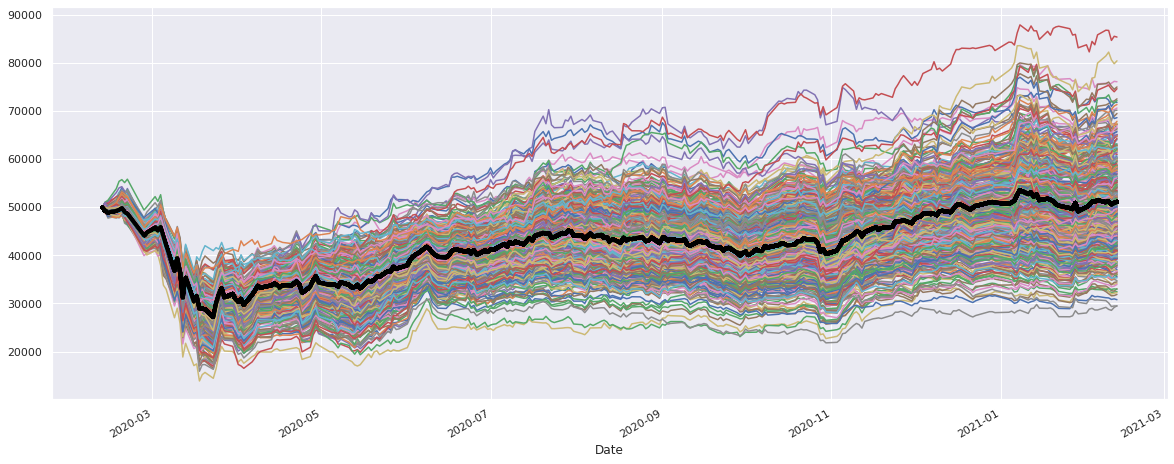

In [20]:
for i in range(500):

  carteira=random.choices(dados.columns, k=5)
  carteira= 10000*retorno_acumulado.loc[:, carteira]
  carteira['saldo']=carteira.sum(axis=1)
  carteira["saldo"].plot(figsize=(20,8))
  

  (ibov*50000).plot(linewidth=4, color='black')